In [5]:
import numpy as np

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def region_query(data, point_index, eps, distance_fn):
    neighbors = []
    for i in range(len(data)):
        if distance_fn(data[point_index], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

def dbscan(data, eps, min_samples, distance_fn):
    labels = [None] * len(data)
    cluster_label = 0

    for i in range(len(data)):
        if labels[i] is not None:
            continue
        neighbors = region_query(data, i, eps, distance_fn)
        if len(neighbors) < min_samples:
            labels[i] = -1  # Noise point
        else:
            cluster_label += 1
            expand_cluster(
                data, labels, i, neighbors, cluster_label, 
                eps, min_samples, distance_fn
            )
    return labels

def expand_cluster(
        data, labels, point_index, neighbors, cluster_label, 
        eps, min_samples, distance_fn
):
    labels[point_index] = cluster_label
    i = 0
    while i < len(neighbors):
        n = neighbors[i]
        if labels[n] is None:
            labels[n] = cluster_label
            new_neighbors = region_query(data, n, eps, distance_fn)
            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors
        elif labels[n] == -1:  # Previously marked as noise
            labels[n] = cluster_label
        i += 1

# 示例数据
data = np.array([[1, 2], [2, 2], [2, 3],
                 [8, 7], [8, 8], [25, 80]])

# 调用DBSCAN算法
eps = 3
min_samples = 2
labels = dbscan(data, eps, min_samples, euclidean_distance)

print("DBSCAN聚类结果:")
print(labels)


DBSCAN聚类结果:
[1, 1, 1, 2, 2, -1]


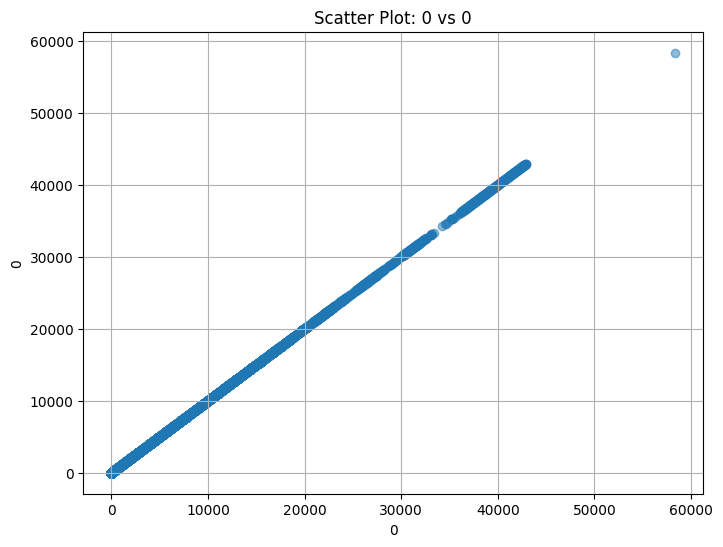

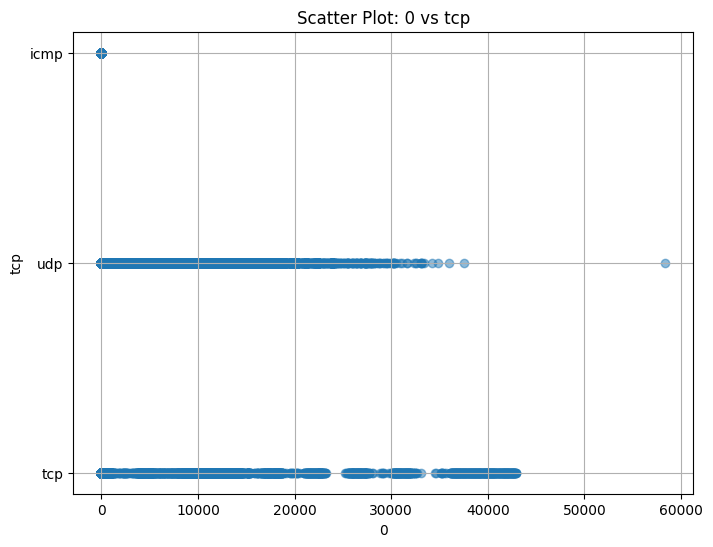

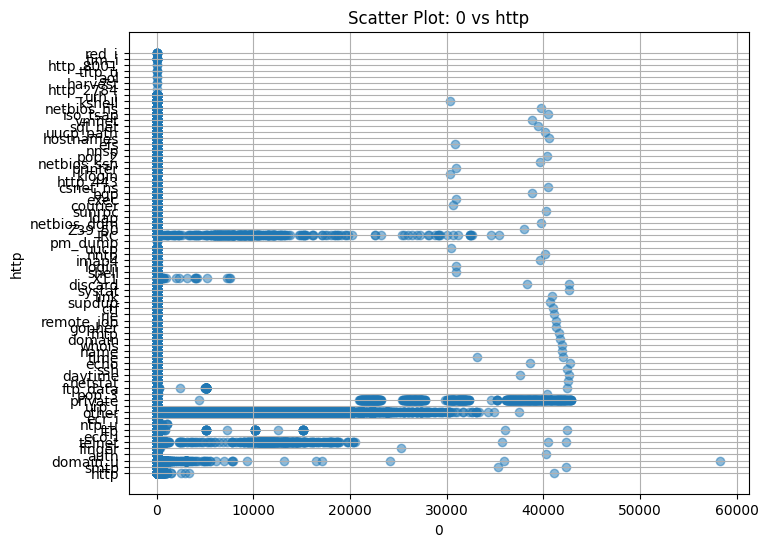

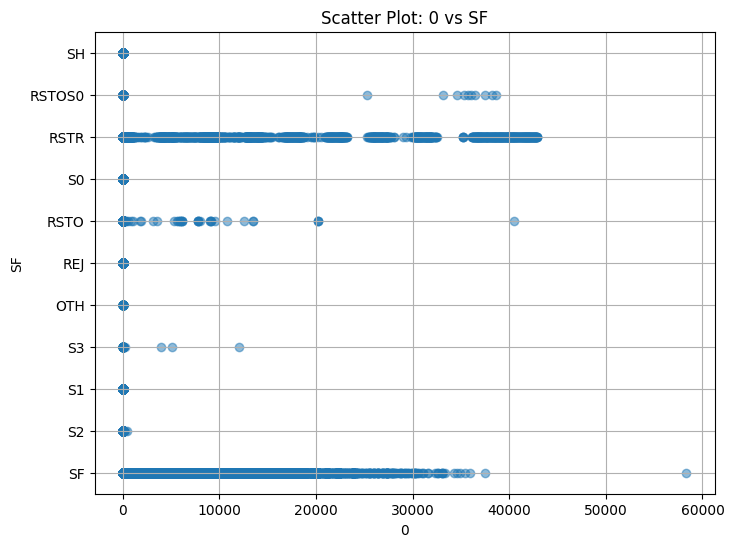

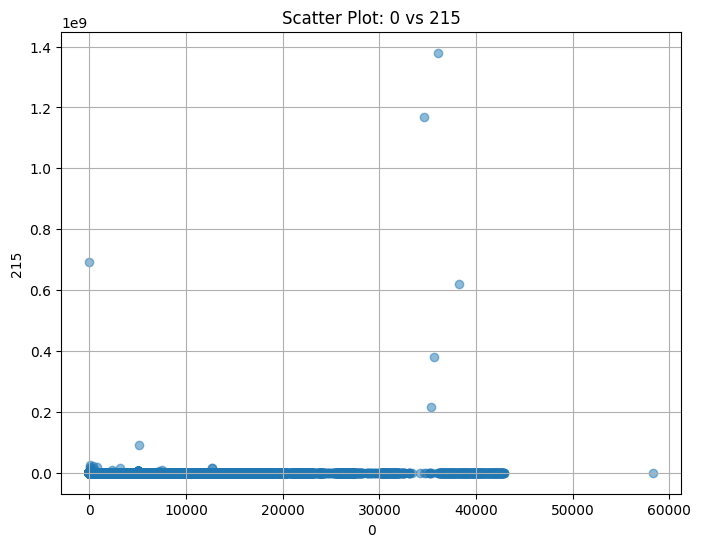

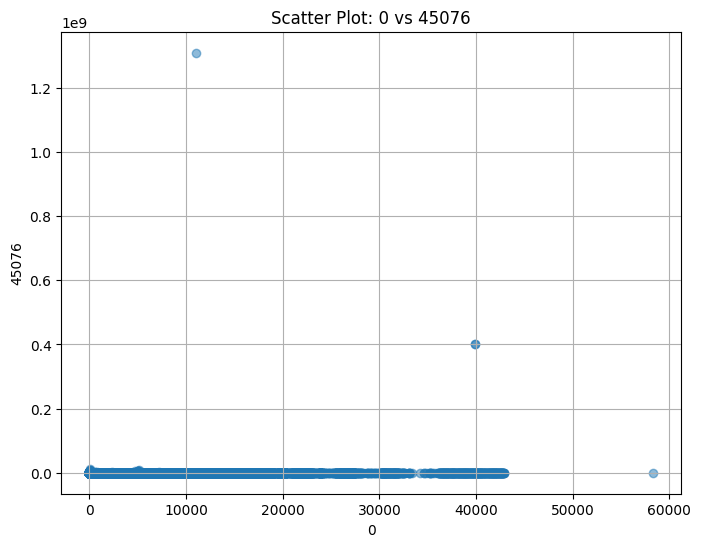

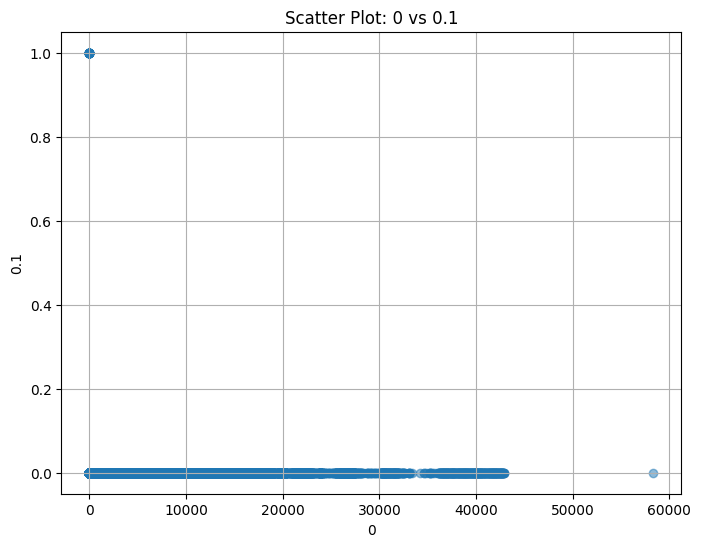

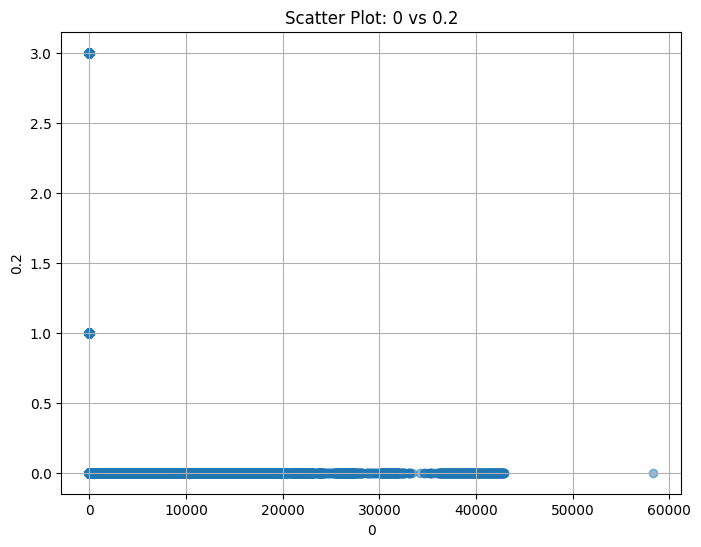

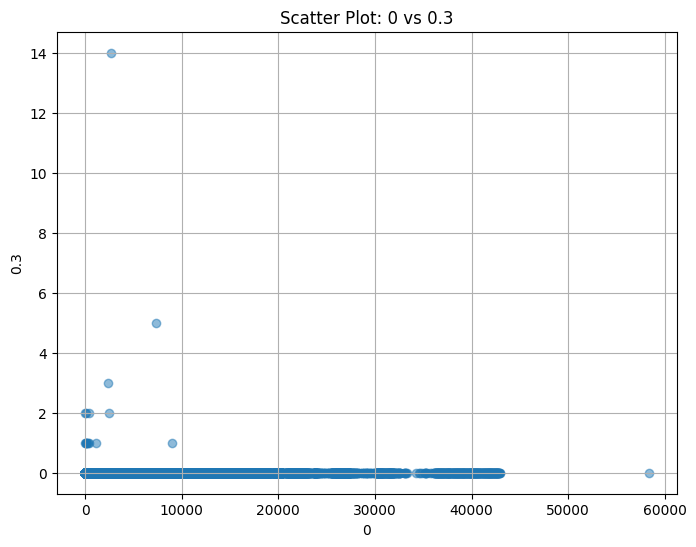

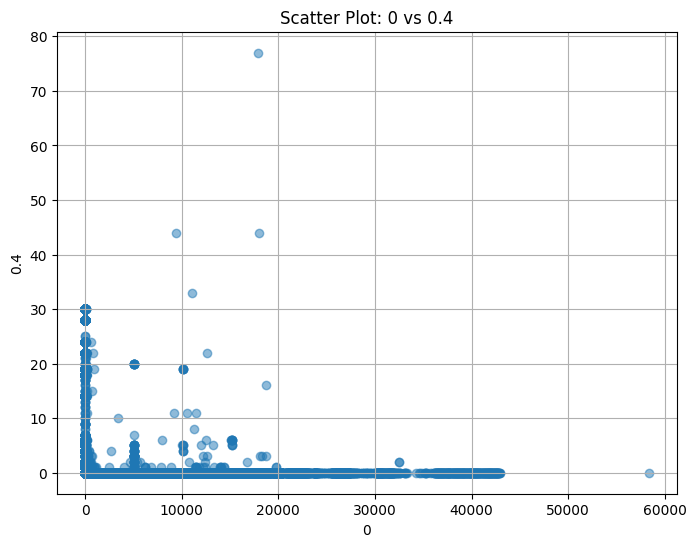

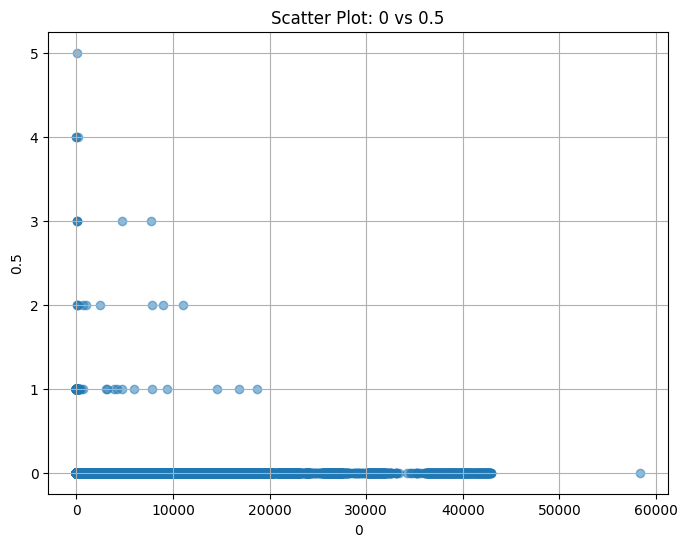

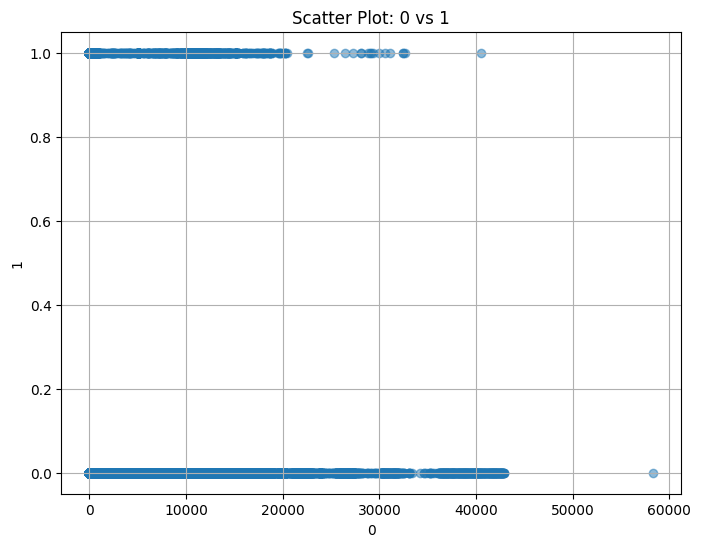

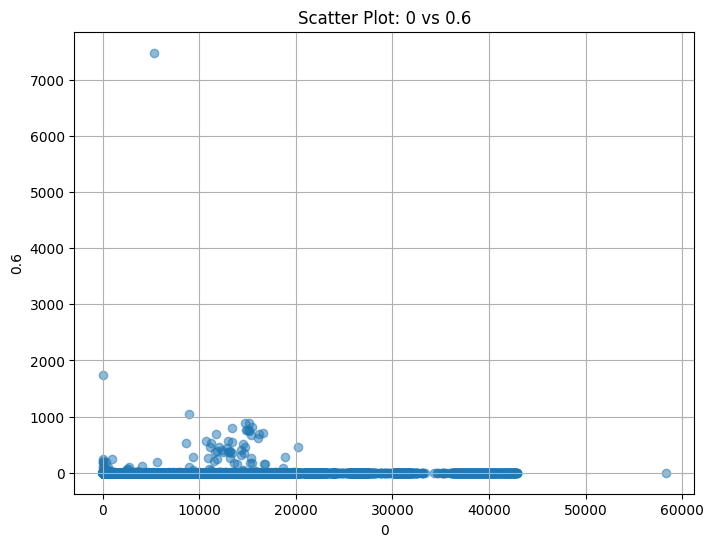

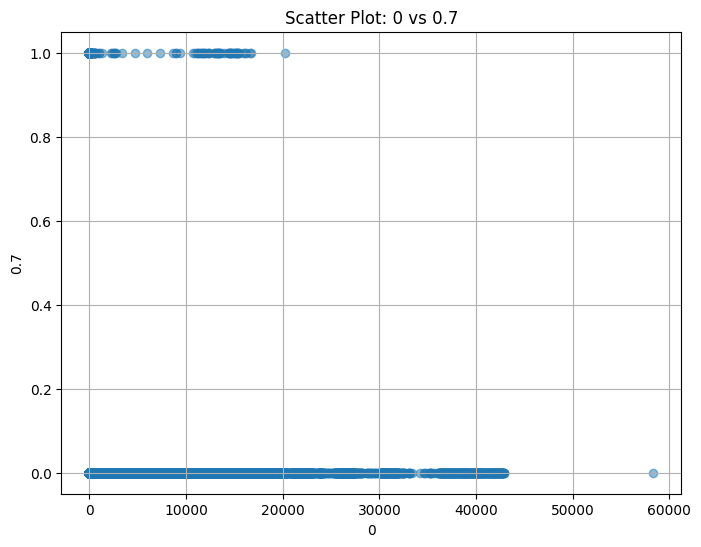

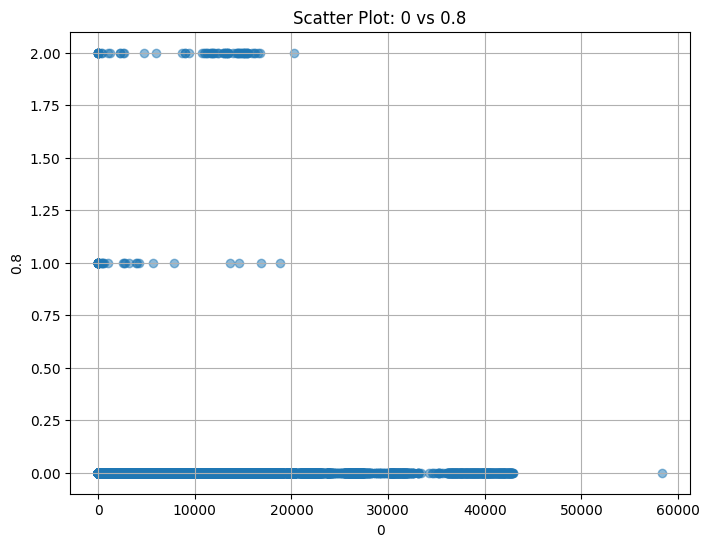

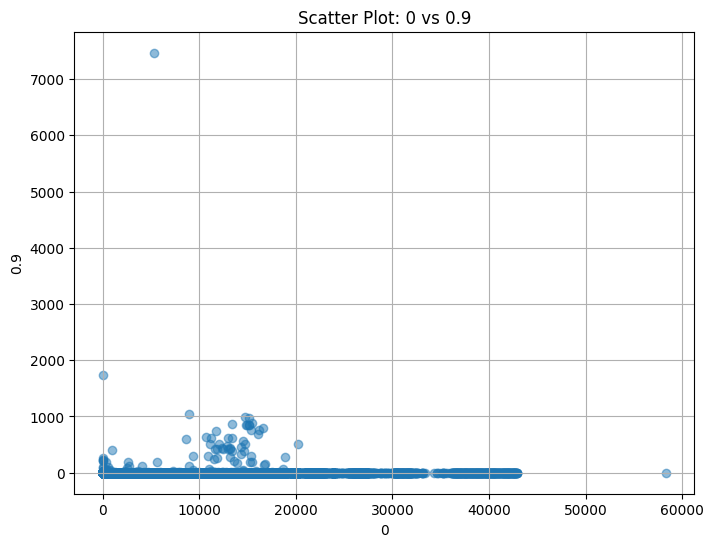

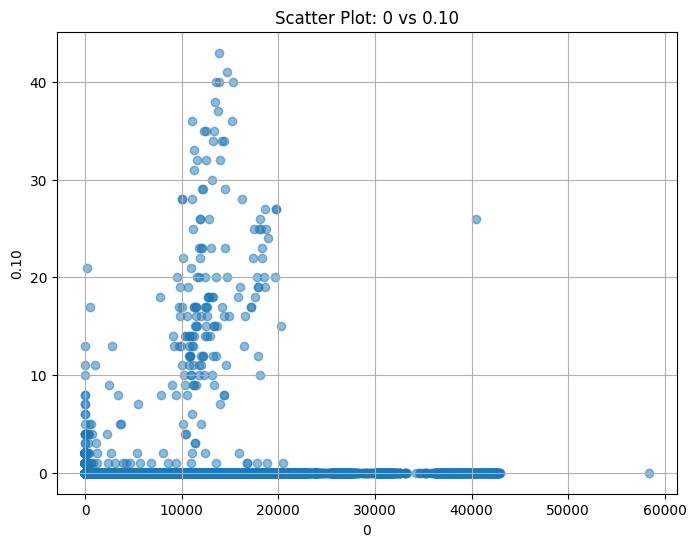

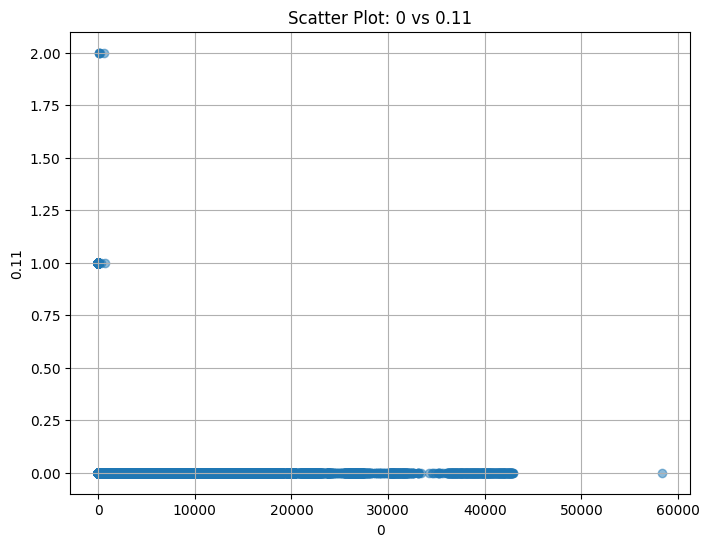

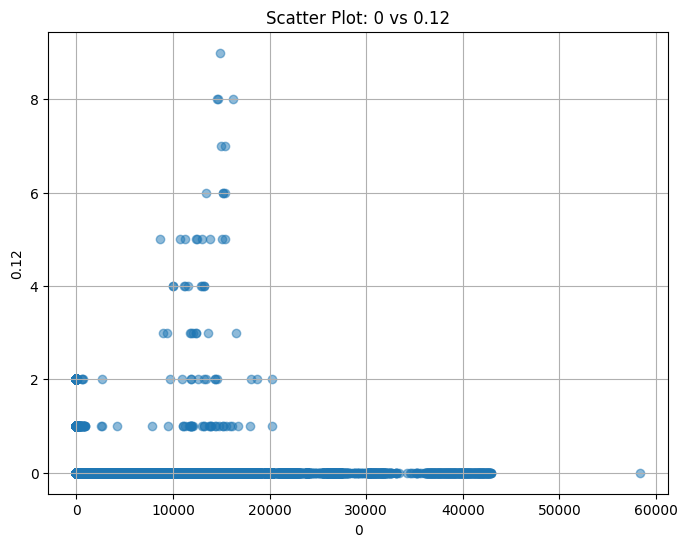

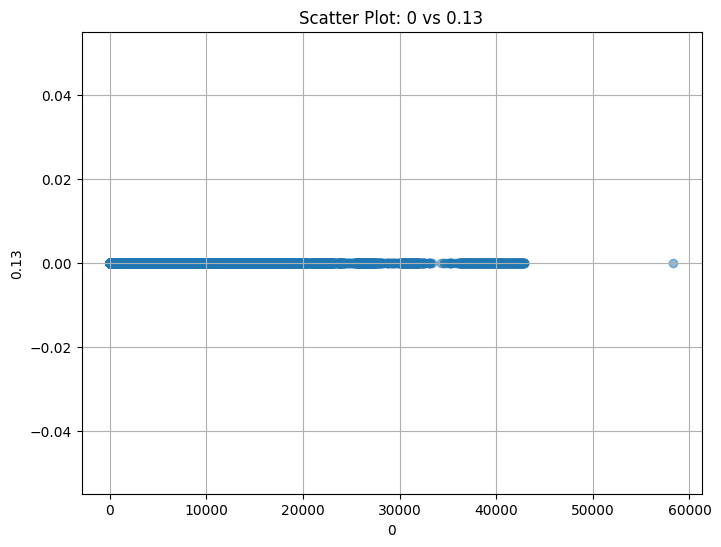

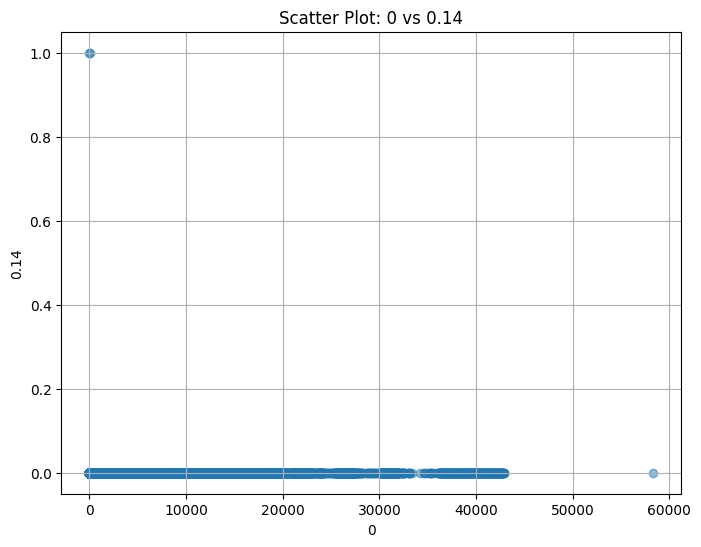

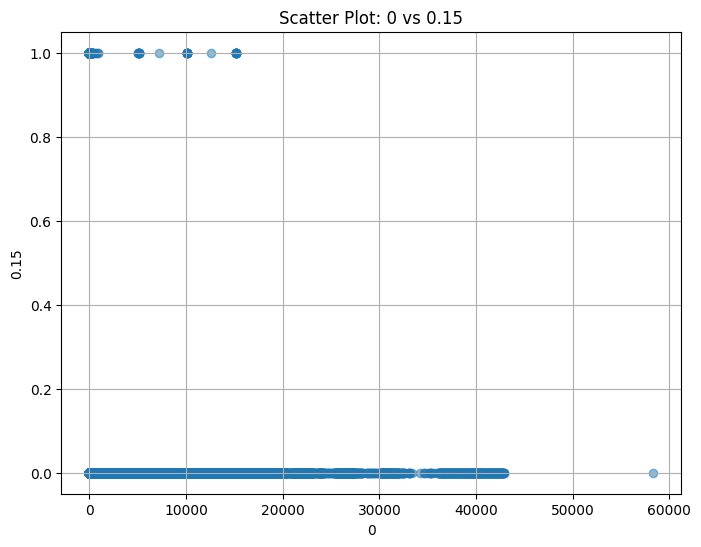

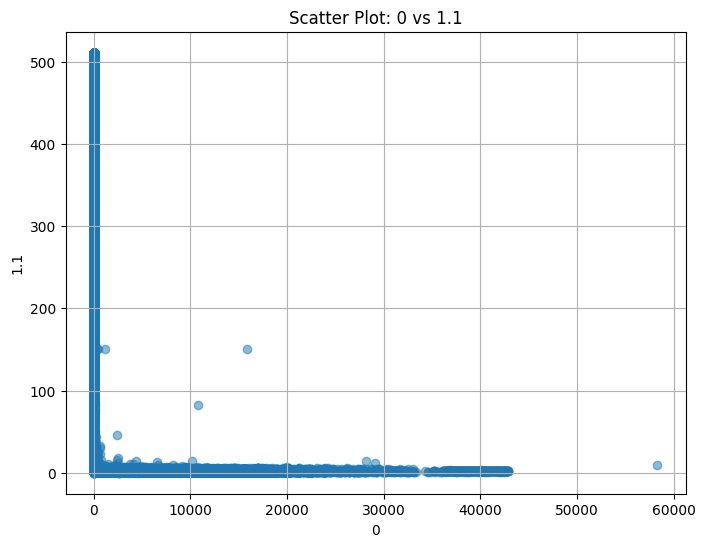

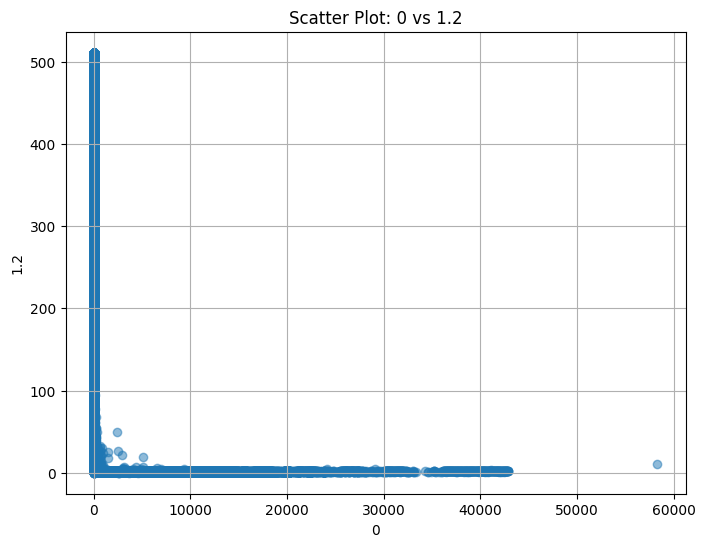

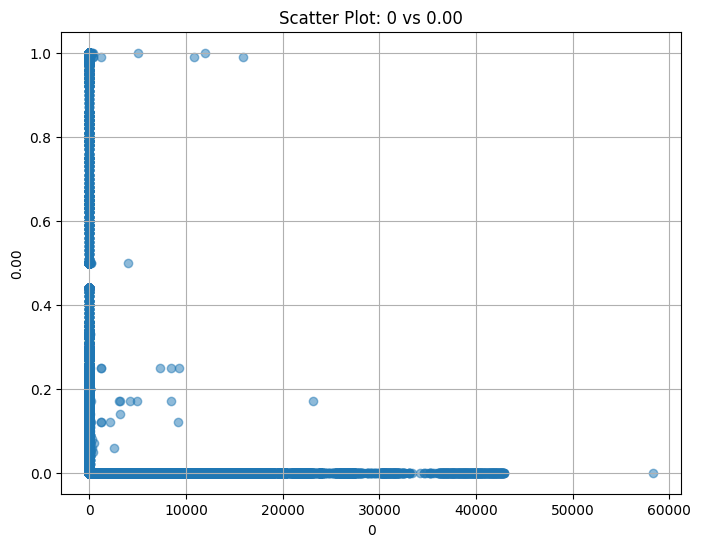

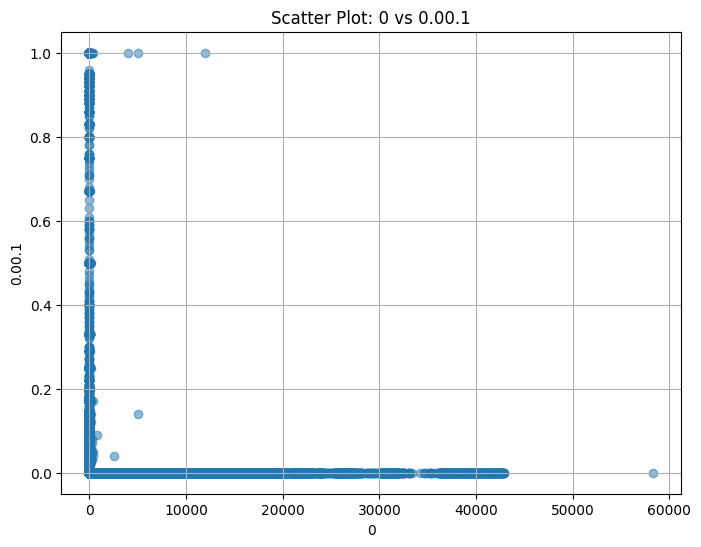

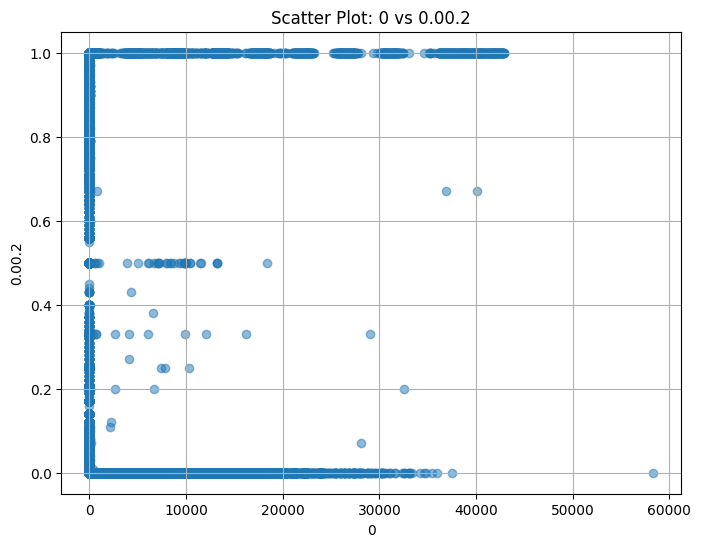

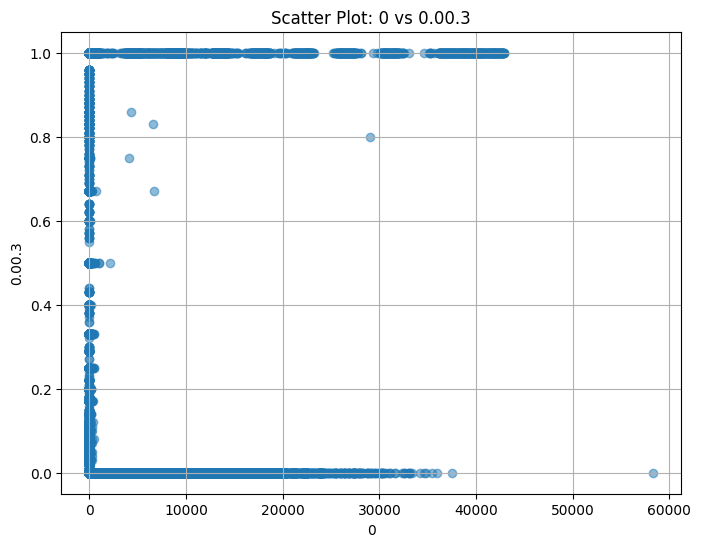

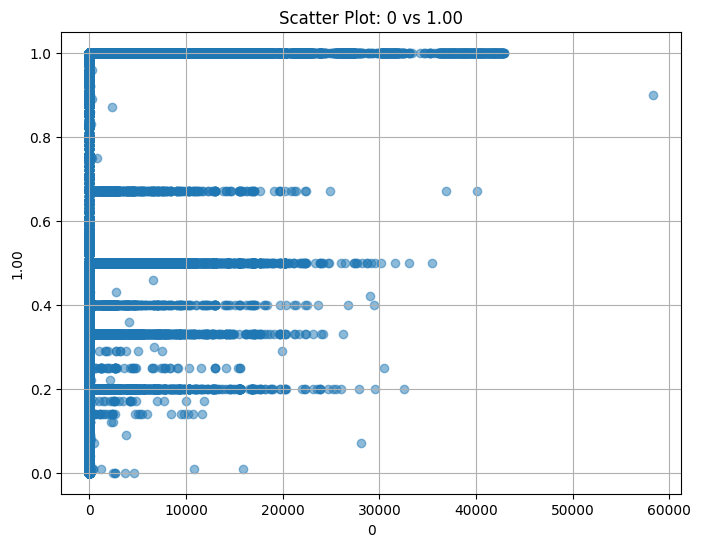

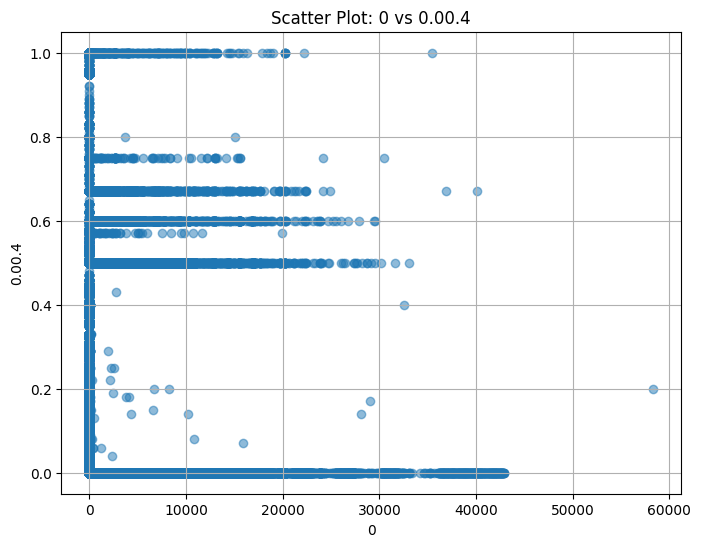

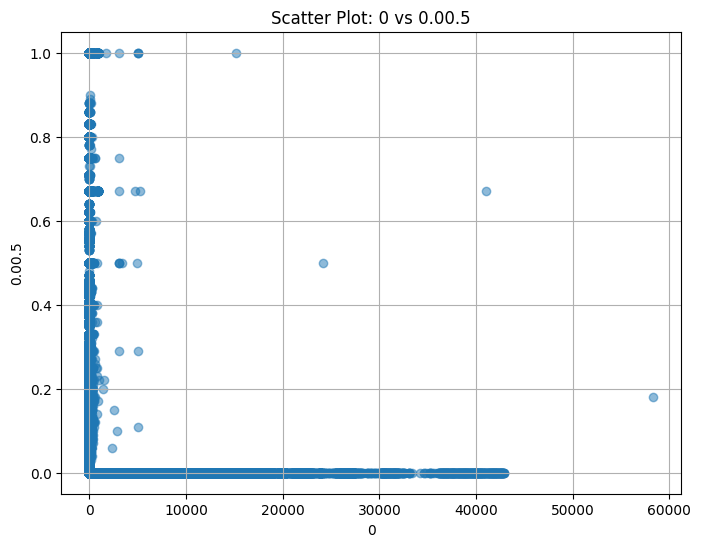

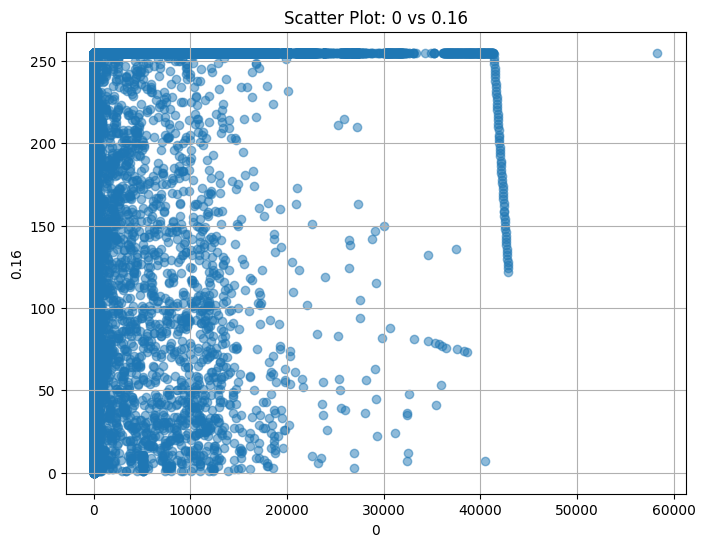

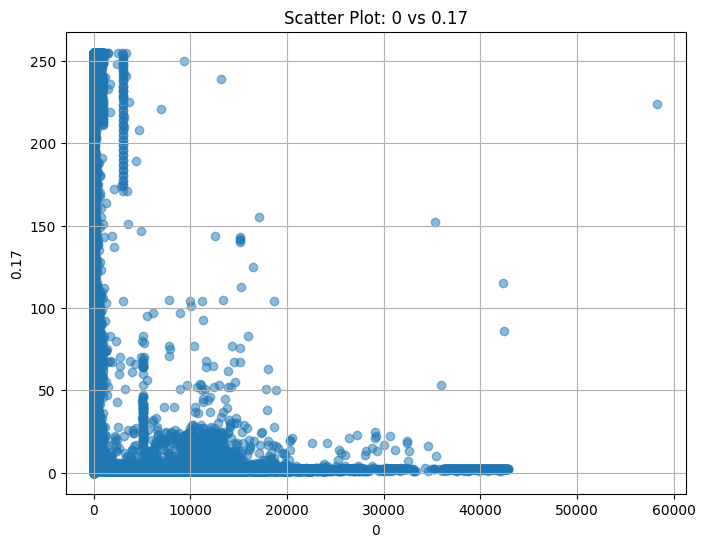

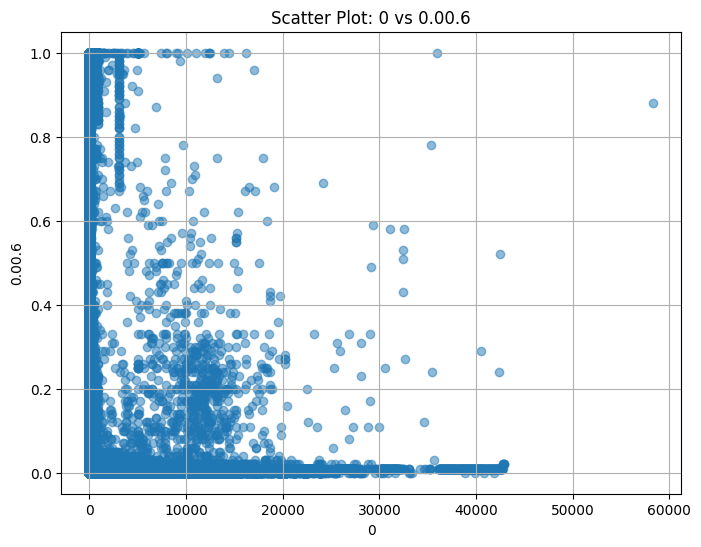

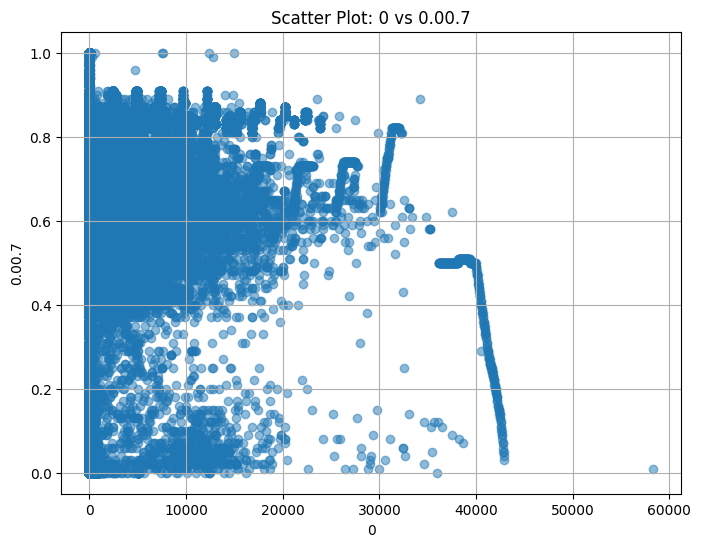

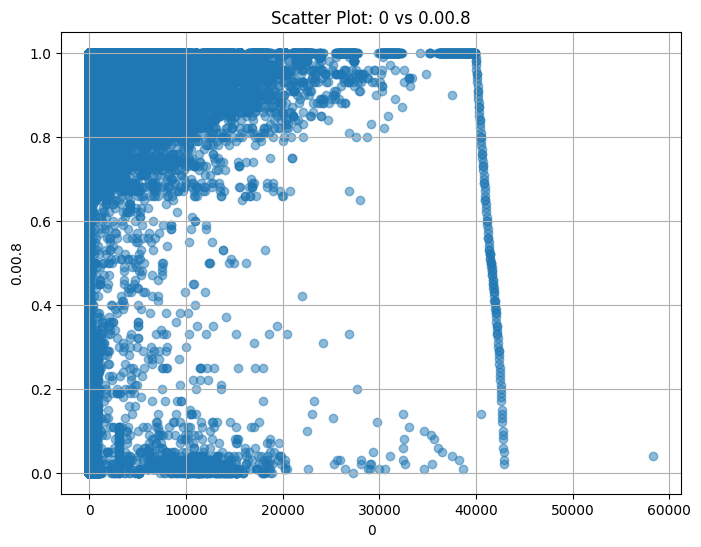

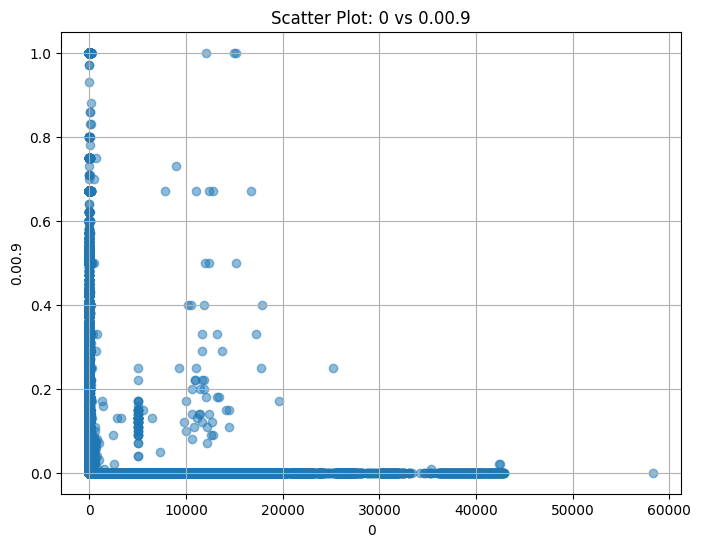

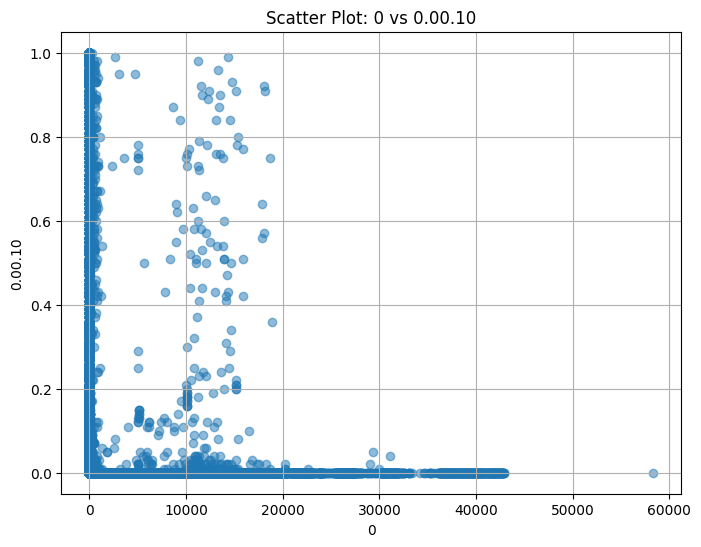

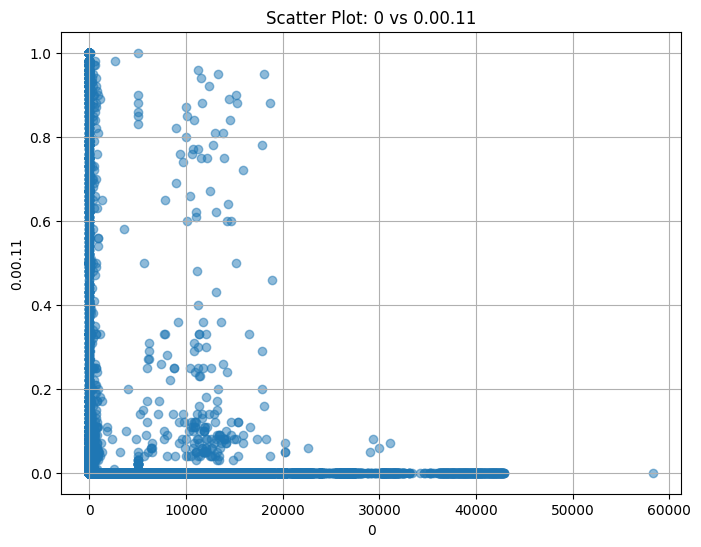

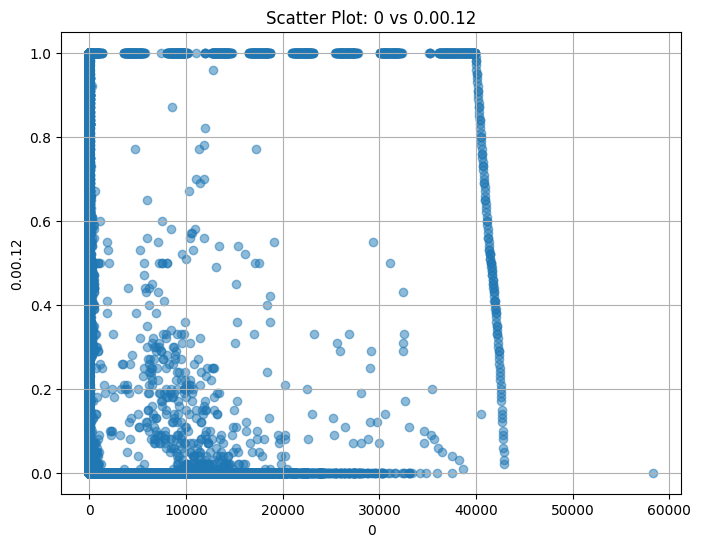

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

# 读取数据
data = pd.read_csv('kddcup.data.gz')

# 获取所有数值列名
columns = data.columns

# 创建每两列的组合
# column_combinations = list(combinations(columns, 2))

# 生成并显示每个组合的散点图
# for col1, col2 in column_combinations:
for col in columns:
    col1 = columns[0]
    col2 = col
    plt.figure(figsize=(8, 6))
    plt.scatter(data[col1], data[col2], alpha=0.5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.grid(True)
    plt.show()
    plt.close()
